<a href="https://colab.research.google.com/github/EstebanPezzi/learning-ai/blob/main/resumen_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduccion a las redes neuronales

Para aprender que es una red neuronal primero arrancamos con un tipo de neurona llamada *perceptron*. Desarrollados entre 1950 y 1960 (Frank Rosenblatt).
¿Como funcionan los perceptrones? Estos toman varios inputs binarios x1, x2,..., xn y producen un valor binario como output. Rosenblatt propuso una manera simple de calcular el output, multiplicar cada input xi por un peso wi, el peso indica la importancia que tiene el input con el output. El output se determina mediante la sumatoria de cada input multiplicado por su peso ∑iwixi y si es menor o igual o mayor a un valor limite. Como el peso, el limite es un valor real, parametro de la neurona
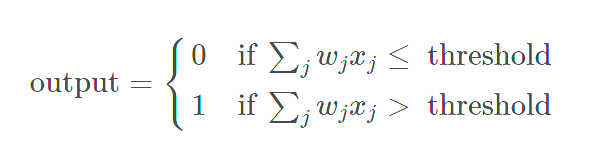



Una manera de pensar a los perceptrones es como un dispositivo que toma desiciones en base al peso de una evidencia. Pequeño ejemplo: hay un carnaval en la ciudad el fin de semana y, como nos gusta mucho el carnaval, tenemos que decidir si vamos o no. Nuestra decision va a ser la suma de los pesos de estos 3 factores:


1.   El clima va a estar bueno?
2.   Tu novia/amigo te puede acompañar?
3.   El transporte publico llega a ese lugar? (suponemos que no tenemos auto)

Podemos representar estos 3 factores asignandoles variables binarias x1, x2 y x3. Tendremos x1=1 si el clima esta bueno y x2=0 si esta feo. Analogamente con x2 y x3, le asignamos 1 si la caracteristica nos favorece o 0 si no.

Ahora, suponemos que somos realmente fanaticos de los carnavales y no nos interesa si el transporte publico llega o si algun amigo no nos acompaña. Pero, como odiamos el clima malo nos replanteamos la idea de ir. Usamos los perceptrones para modelar esta toma de desiciones. Una forma de hacerlo es elegir pesos w1=6 para el clima, w2=2 y w3=2 para las otras condiciones. El valor alto en w1 indica que la condicion climatica es importante para nosotros, mas que un amigo nos acompañe o si el transporte publico llego al lugar. Finalmente, suponemos que elegimos un limite (threshold) de 5 para el perceptron. Con estas elecciones, el perceptron implementa el modelo de toma de decision deseado, dando como resultado 1 si el clima es bueno o 0 si el clima es malo. No hay ninguna diferencia en el output en cuanto a si tu amigo te acompaña o si el transporte publico llega.



Variando los pesos (wi) y el limite (threshold) podemos tener diferentes modelos de toma de decision.

Podemos simplificar la manera de describir a los perceptrones. La condicion ∑jwjxj>threshold es incomoda, y pueden hacerse dos cambios para mejorarla. El primero es escribir ∑jwjxj como un producto punto (mult de vectores) w⋅x≡∑jwjxj. El segundo cambio es mover el threshold al otro lado de la inecuacion, y reemplazarlo por lo que se conoce como el sezgo del perceptron (bias) b≡−threshold. Usando el bias en vez del threshold, la regla del perceptron puede reescribirse como

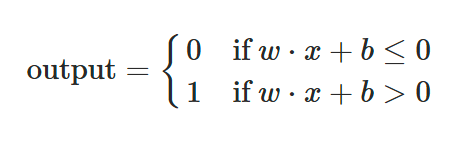

Podemos interpretar el bias como una medida de cuan simple es que el output del perceptron sea 1. Para perceptrones con bias grande es mas facil tener un output 1. Pero si el bias es negativo, entonces es dificil que el resultado del perceptron sea 1. El bias es una simplificacion que, de ahora en mas, se va a usar en reemplazo del threshold.



# Sigmoid neurons

Como hacemos para que la red neuronal aprenda a resolver un problema? Por ej., los inputs de una red pueden ser pixels de una imagen de texto escrito a mano escaneada. Queremos que la red aprenda pesos (w) y sesgos (b) de modo que clasifique correctamente digitos. Para ver como puede funcionar, haremos un pequeño cambio en el peso ( o en el sesgo) en la red. Queremos que este pequeño cambio cause el correspondiente pequeño cambio en el output de la red. Esta propiedad hara que el aprendizaje sea posible. Abajo se ve un grafico con la idea:
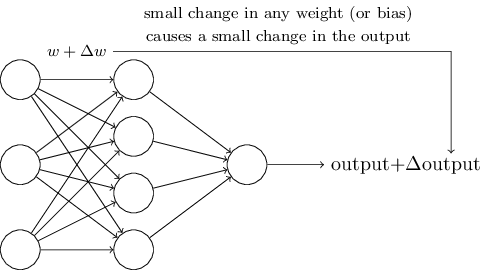

Si es verdadero que un pequeño cambio en el peso (o sesgo) causa solo un pequeño cambio en el output, entonces podemos usar esta proposicion para modificar los pesos y sesgos para que la red se comporte de la forma que queremos.

Realmente, el problema radica en que cualquier cambio en el peso o el sesgo en una red neuronal puede hacer que el output rote, cambiando de 0 a 1. Este giro puede cambiar el comportamiento del resto de la red de una manera complicada. Estaremos consiguiendo la salida deseada (por ej., ingresar una imagen de un 9, que la prediccion sea un 8, ajustar una neurona para que la prediccion sea correcta, o sea, un 9) mientra el procesamiento de otras imagenes cambiara de una manera dificil de controlar. Esto hace dificil ver como cambiar gradualmente los pesos y sesgos par que la red este cada vez mas cerca del comportamiento deseado. Hay mejores formas de solucionar este problema, se veran mas adelante.

Podemos superar este problema con un nuevo tipo de neuronas, llamadas *sigmoid neuron*. Estas son similares a los perceptrones, pero modificadas para que pequeños cambios en sus pesos y sesgos solo tengan pequeños cambios en el output. Este factor es crucial para que las sigmoid neurons puedan aprender.

Los sigmoid neuron son como los perceptrones, pero toman valores entre 0 y 1, a diferencia de los perceptrones que son binarios. La composicion es la misma, pesos y un sesgo, pero en vez de ser una funcion escalon esta se representa por la funcion sigmoid, tambien conocida como funcion logistica σ(w⋅x+b), donde σ (letra sigma minuscula del alfabeto griego) se define como σ(z)≡1/(1+e^−z)

Haciendola mas explicita, el output de la sigmoid neuron, con pesos w1, w2,..,wn y pesos b1, b2,.., bn y sesgo b tiene esta forma 1/(1+e^(-∑jwjxj−b)

Para entender la similaridad entre con el perceptron supongamos que z≡w⋅x+b es un numero entero grande. Entonces e^−z≈0 y σ(z)≈1. En otras palabras, cuando z=w⋅x+b es un positivo grande, el output para la sigmoide es aproximadamente 1, como seria para el perceptron. Supongamos, de manera contraria, que z=w⋅x+b es un entero muy negativo. Entonces e^-z tiende a infinito (e^−z→∞), y σ(z)≈0. entonces cuando σ(z)≈0 es un entero muy negativo, el comportamiento de la sigmoide se aproxima al perceptron

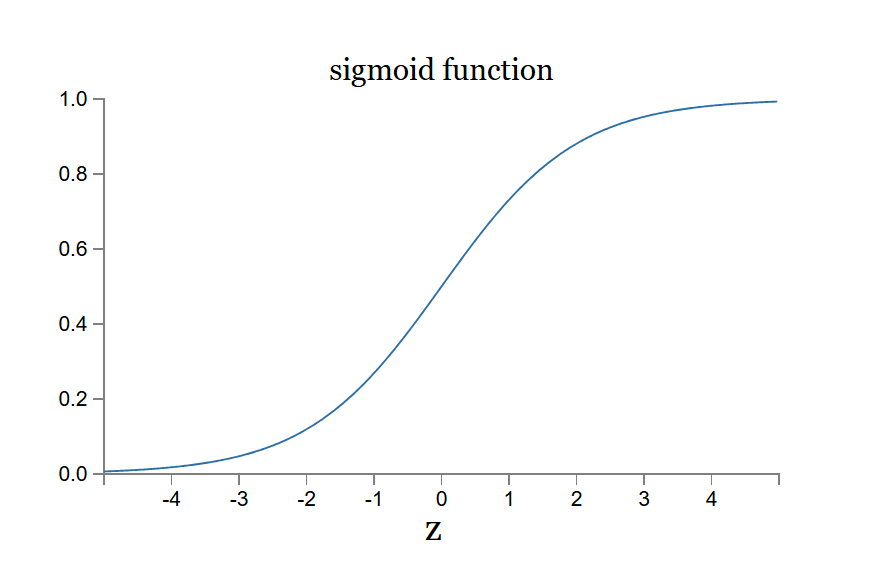

Y esta es la forma de la funcion escalon del perceptron

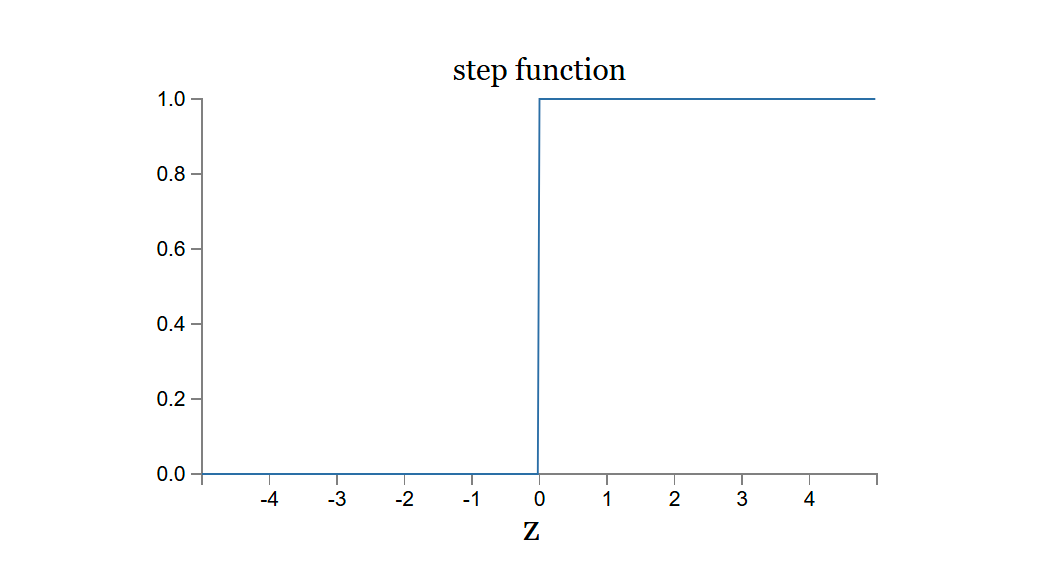

La "suavidad" de la sigmoide es lo que hace que pequeños cambios en Δwj en los pesos y Δb en el sesgo produce un pequeño cambio en Δoutput del output de la neurona. De hecho, el calculo nos dice que Δoutput es aproximada a

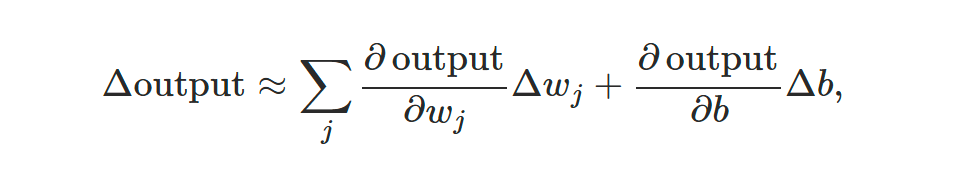

Esta linearidad hace facil la eleccion de pequeños cambios en los pesos y el sesgo para lograr el pequeño cambio deseado en el output.

El objetivo principal del uso de funciones de activacion diferentes es que los valores particulares de las derivadas parciales en la ecuacion anterior cambien. Sigmoid es comunmente usas en redes neuronales, y es la mas frecuente que vamos a ver en los ejemplos siguientes.

Como debemos interpretar el output de una sigmoid neuron? La gran diferencia entre la sigmoide y el perceptron es que la sigmoide puede tomar infinitos valores reales entre 0 y 1. Esto es util, por ejemplo, cuando queremos usar el output para representar el valor medio de la intensidad de los pixeles en una imagen que se ingresa en un red neuronal. Pero a veces es un sin sentido. Supongamos que el output nos dice "la imagen es un 9" o "la imagen no es un 9". Obviamente, seria facil hacer el output nos devuelva 0 o 1, como en un perceptron. Pero en la practica podemos tomar convenciones y decidir que si el valor es mas que 0.5 indica que el ouput es "9", y para cualquier valor menor que este va a indicar que "no es un 9".

# Arquitectura de las redes neuronales

Supongamos que tenemos una red con la siguiente forma
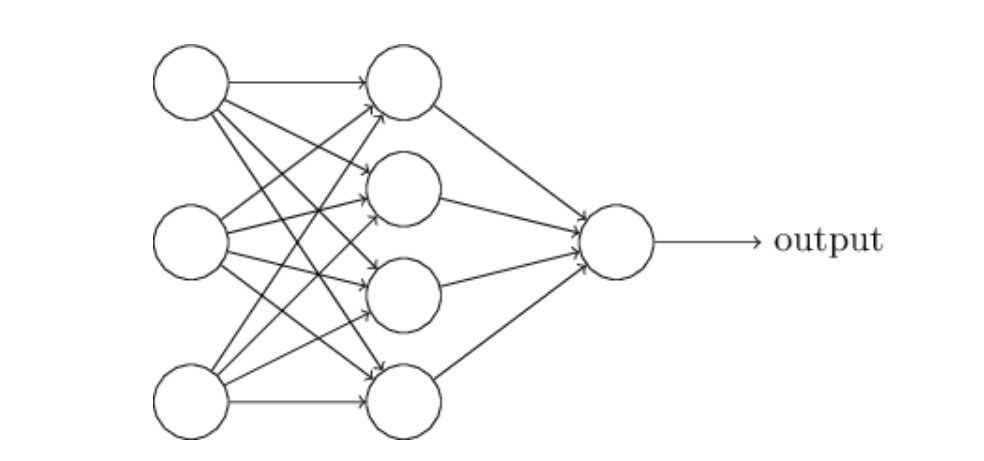

La capa mas a la izquierda es la input layer, y sus neuronas se llaman input neurons. La capa mas a la derecha se llama output layer con output neurons. La capa media es llamada hidden layer, ya que sus neuronas no son de input ni de output. Las redes pueden tener 0 o mas capas intermedias.

El diseño de las capas de entrada y salida suele ser sencillo. Por ejemplo, queremos determinar si una imagen de texto escrito a mano es un "9" o no. Una manera natural de diseñar la red es codificar las intensidades de los pixeles y colocarlos como neuronas de entrada. Si la imagen es 64 por 64 en escala de grises, entonces tendremos 4096 = 64 x 64 input neurons, con intensidades escaladas entre 0 y 1. La capa de salida contiene una sola neurona, indicando valores menores a 0.5 si la imagen "no es un 9" y mayores a 0.5 indicando si "es un 9"

Mientras que  el diseño de las capas de entrada y de salida es sencillo, el de las hidden layers es un arte. En general, no es posible resumir el proceso con simples reglas generales. En cambio, investigadores han desarrollado heuristicas que ayudan a la gente a tener el comportamiento buscado en sus redes neuronales. Por ej., estas heuristicas pueden usarse para ayudar a entender como compensar el numero de capas ocultas contra el tiempo requerido para entrenar la red.

Hasta ahora hemos visto redes en las que el output de una capa es usado como input de la siguiente. Estas redes se llaman feedforward neural networks. Esto quiere decir que no hay loops o ciclos en estas redes - la informacion siempre circula hacia adelante.


Sin embargo, hay modelos en los que los ciclos estan permitidos. Estos modelos se llaman **recurrent neural networks**. La idea de estos modelos es tenes neuronas que se activen por un tiempo limitado, antes de quedar inactivas. Esta activacion puede estimular otras neuronas, que se activaran en momentos, tambien por tiempo limitado.

Las redes neuronales recurrentes han sido las menos influenciadoras que las feedforward, en parte porque los algoritmos de las recurrentes tienen menos poder. Pero siguen siendo muy interesantes. Estan mucho mas cerca de funcionar de una forma en la que nuestros cerebros funcionan.

# Una red simple para clasificar redes digitos escritos a mano

Queremos dividir el problema de reconocimiento de digitos en dos sub-problemas. Primero, debemos encontrar una forma de separ las imagenes que contienen muchos digitos en una secuencia de imagenes separadas, cade una conteniendo un solo digito.

Los humanos resolvemos la segmentacion con facilidad, pero es desafiante para una programa dividir correctamente la imagen.

Nos enfocaremos en escribir un programa que clasfique los digitos individuales. Hacemos esto porque la segmentacion no es un problema dificil de resolver, una vez que tenes un modelo que pueda clasificar correctamente.

Para reconocer digitos individuales usaremos una red con tres capas
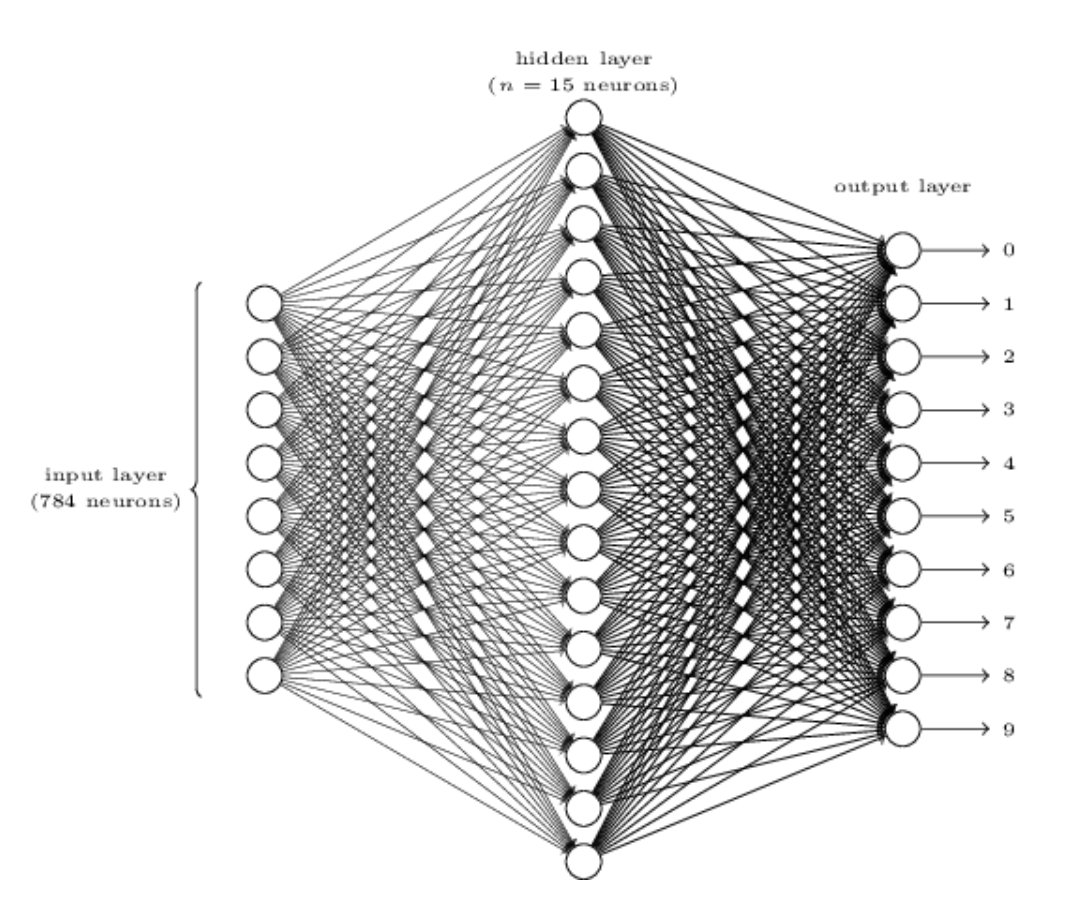

La capa de entrada contiene los pixeles de la imagen, uno por neurona. Nuestros datos de entrenamiento tendran un tamaño de 28x28 pixeles con digitos escritos a mano escaneados, y la capa tendra 28x28=784 neuronas. Los pixels se representan en escala de grises, con valores entre 0 y 1.

La segunda capa es la hidden layer. Denotamos la capa con n cantidad de neuronas, ya que experimentaremos con diferentes numeros. Para el proximo usaremos una pequeña cantidad, con n = 15.

El output contiene 10 neuronas, una por cada digito entre 0 y 9. Si la primer neurona se enciende, por ej., da un valor aproximado a 1, entonces indicara que la res piensa que el digito es 0. Y asi sucesivamente con el resto de los posibles valores.

Otra manera similar de output seria usar 4 output neurons, enseñando a la red a mostrar valores en binario, dependiendo que tan cerca esta el output del 0 o del 1. Cuatro es suficiente, ya que 2^4=16, y necesitamos 10 valores. Por que el modelo debe usar 10 output neurons? Es esto ineficiente? La justificacion es empirica. Podemos probar los dos modelos y, al parecer, para este problema en particular, la red con 10 neuronas es la mas eficiente. Hay alguna heuristica que nos diga con antelacion por que debemos usar 10 neuronas como salida, versus las 4?

Para entender esto, pensemos que hacen las redes neuronales desde el principio. Consideremos la red con 10 output neurons. Concentremonos en la primer output neuron, la que nos va a decir si el primer digito es, o no, un 0. Esto lo hace pesando la evidencia de la capa oculta de neuronas. Que hacen estas neuronas ocultas? Suponemos, para este argumento, que la primera neurona de la capa oculta detecta si la imagen es o no como la siguiente
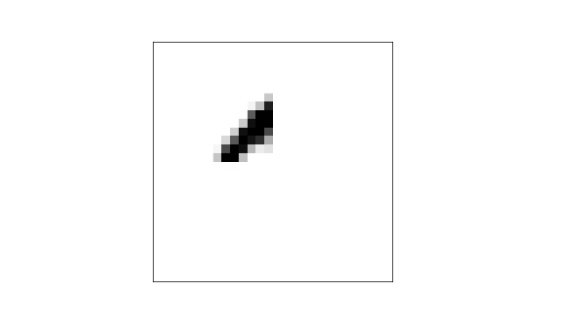


Lo hace ponderando fuertemente los input pixels que se superponen con la imagen, y suavemente con los otros inputs. De una manera similar supongamos que la segunda, tercera y cuarta neurona de la capa oculta detecta si los siguientes imagenes estan presentes:
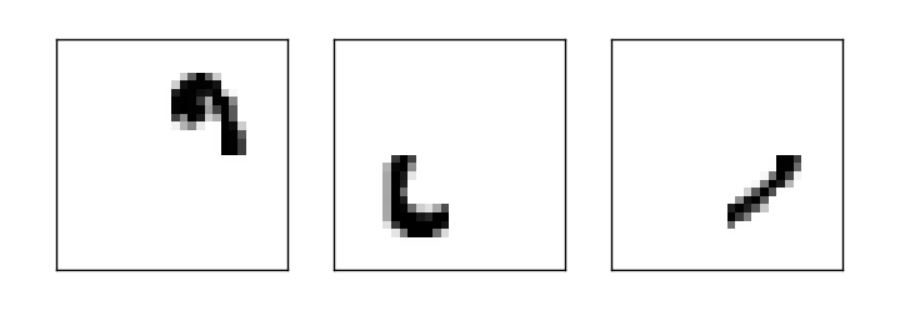

Como pudiste adivinar, estas cuatro imagenes funtas hacen la imagen del 0
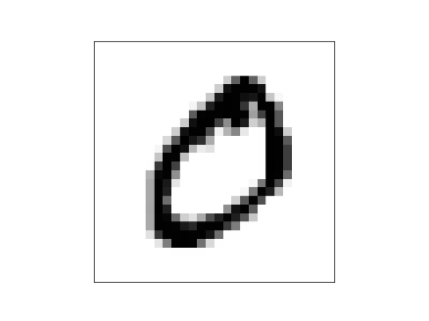

Entonces si estas 4 neuronas se activan podemos decir que la imagen es un 0. Por supuesto, no es la una forma de ordenar la evidencia que usaremos para concluir que la imagen es un 0 - llegaremos a la conclusion que es un 0 de otras maneras.

Suponiendo que la red neuronal funciona de esta manera podemos una explicacion al por que es mejor que tenga 10 neuronas de salida. Si tuvieramos 4, el primer output neuron deberia decidir cual es el bit mas significativo del digito. Y no hay manera facil de decidir esto simplemente con formas como las anteriores. Es dificil imaginar que hay alguna razon para mostrar que la forma de un digito puede decirnos cual es el bit mas significativo.

Dicho esto, es todo cuestion de heuristica. Nada nos dice que una red de 3 capas tiene que operar de la forma que se describio, con las hidden neurons detectando simples formas. Tal vez un mejor algoritmo encontrara alguna asignacion de pesos que nos lleve a usar solamente 4 output neurons. Pero como heuristica, la forma de pensar que se describio funciona bastante bien y puede ahorrarle tiempo en el diseño de buenas arquitecturas de redes neuronales.



# Aprendiendo con gradient descent

Ahora que tenemos el diseño para la red neuronal, como hacemos para que reconozca digitos? Lo primero que necesitamos es un data set para aprender, llamado data set de entrenamiento. Usaremos MNIST data set, que contiene decenas de miles de imagenes escaneadas de texto escrito a mano, con sus clasificaciones correctas. Aqui se muestran algunas imagenes:
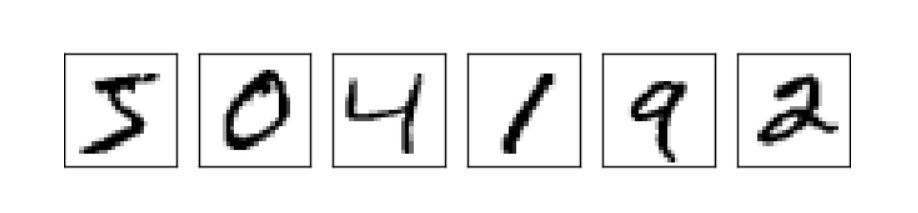

La informacion en MNIST se divide en dos partes. La primera contiene 60 mil imagenes para ser usada como datos de entrenamiento. Estas imagenes son muestras escaneadas de texto escrito a mano de 250 personas, mitad adultos mitad estudiantes de secundaria. El tamaño de las imagenes es de 28x28 pixeles en escala de grises. La segunda parte de MNIST son 10 mil imagenes para ser unsadas como test data. Esta se usara para evaluar cuan bien aprendio nuestra red neuronal a reconocer digitos. Para que tenga un buen funcionamiento, los datos de testeo se obtuvieron de 250 diferentes personas diferentes a las de los datos de entrenamiento. Esto nos ayuda a que nuestro sistema reconozca digitos de personas que no vio durante el entrenamiento.

Usaremos la notacion x para describir al training input. Sera conveniente considerar que cada training input x como un vector de dimension 28x28 = 784. Cada posicion del vector representa una escala de grises para cada pixel en la imagen. Denotaremos el correspondiente output como y = y(x), donde y es un vector de 10 dimensiones. Por ejemplo, si una imagen de entrenamiento, x, predice un 6, entonces y(x)=(0, 0, 0, 0, 0, 0, 1, 0, 0)^T es el output deseado para la red. Cabe resaltar que T es la notacion de trasposicion (cambiar filas por columnas).

Lo que queremos es un algoritmo que nos permita encontrar pesos y sesgos tales que el output de la red se aproxime a y(x) para todos los datos de entrenamiento x. Para cuantificar cuan cerca estamos de obtener este resultado definiremos una funcion de costo:
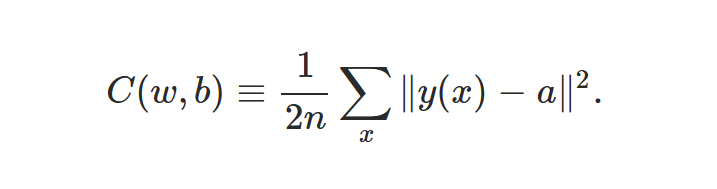

En ella, w denota la coleccion de todos los pesos en la red, b todos los sesgos, n es el total de training inputs, a es el vector de outputs de la red cuando x es un input, y la suma es sobre todos los inputs, x. Por supuesto, el output a depende de x, w y b, pero para dejar la notacion simple no se explicito. La notacion ∥v∥ denota la norma de un vector (longitud entre y(x) y a). Llamaremos a C funcion de costo cuadratica, tambien conocida como mean squared error (error medio cuadrado) MSE. Viendo la funcion de costo cuadratica vemos que C(w,b) no es negativa, ya que cada termino en la suma es no negativo. Ademas, el costo C(w,b) se achica, por ej., C(w,b) ≈ 0, precisamente cuando y(x) es aproximadamente igual al output a, para todos los training inputs, x. Entonces nuestro algoritmo de entrenamiento va a haber hecho un buen trabajo si puede encontrar pesos y sesgos tales que C(w,b) se aproxime a 0. Como contraste, no lo estara haciendo bien cuando C(w,b) sea grande - esto implicara que y(x) no esta cerca del output a para n numero grande de inputs. El objetivo del algoritmo de entrenamiento sera minimizar el costo C(w,b) como una funcion de pesos y sesgos. En otras palabras, queremos encontrar pesos y sesgos tales que el costo sea lo mas chico posible (aproximado a 0).

Por que el costo cuadratico? No estamos interesados en el numero de imagenes correctamente clasificadas por la red? Por que no intentar maximizar el numero directamente, en vez de minimizar una medida de aproximacion como el costo cuadratico? El problema con esto es que el numero de imagenes correctamente clasificadas no es una funcion suave del resto de los pesos y sesgos en la red. Para la mayoria, hace pequeños cambios a los pesos y sesgos no causara ningun cambio en absoluto en el numero de imagenes de entrenamiento clasificadas correctamente. Esto hace dificil entender como cambian los pesos y sesgos para mejorar la